# Demand Forecasting

In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\SML_2_Pr\Log\data_loader.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda: data_merged.csv")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\SML_2_Pr\Data\raw_data\data_merged.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")


# Maqsad: num_orders ustunini bashorat qilish (ya’ni har hafta taom uchun necha dona buyurtma bo‘lishini oldindan aniqlash).

In [4]:
df.head()

,Unnamed: 0,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,0,1379560,1,55,1885,136.83,152.29,0,0,177.0
1,1,1466964,1,55,1993,136.83,135.83,0,0,270.0
2,2,1346989,1,55,2539,134.86,135.86,0,0,189.0
3,3,1338232,1,55,2139,339.50,437.53,0,0,54.0
4,4,1448490,1,55,2631,243.50,242.50,0,0,40.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489121 entries, 0 to 489120
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             489121 non-null  int64  
 1   id                     489121 non-null  int64  
 2   week                   489121 non-null  int64  
 3   center_id              489121 non-null  int64  
 4   meal_id                489121 non-null  int64  
 5   checkout_price         489121 non-null  float64
 6   base_price             489121 non-null  float64
 7   emailer_for_promotion  489121 non-null  int64  
 8   homepage_featured      489121 non-null  int64  
 9   num_orders             456548 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 37.3 MB


# Meal turlari bo‘yicha buyurtmalar

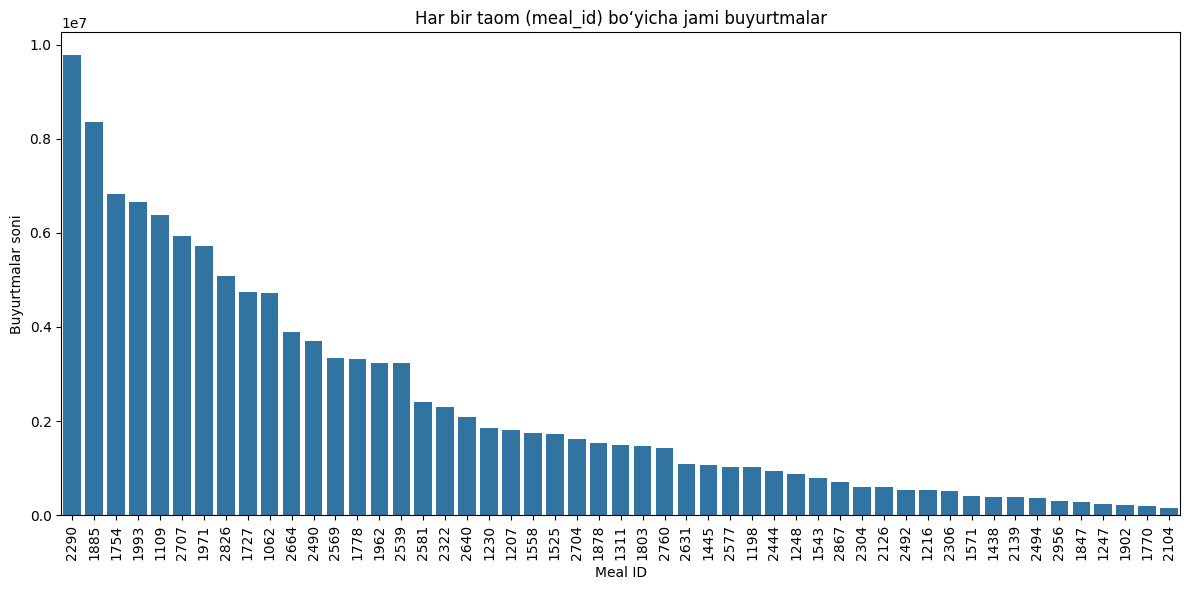

In [8]:
# Meal_id bo‘yicha buyurtmalar soni
import matplotlib.pyplot as plt 
import seaborn as sns 
meal_orders = df.groupby("meal_id")["num_orders"].sum().sort_values(ascending=False)

# Vizualizatsiya
plt.figure(figsize=(12,6))
sns.barplot(x=meal_orders.index.astype(str), y=meal_orders.values)
plt.xticks(rotation=90)
plt.title("Har bir taom (meal_id) bo‘yicha jami buyurtmalar")
plt.xlabel("Meal ID")
plt.ylabel("Buyurtmalar soni")
plt.tight_layout()
plt.show()


# Markazlar (center_id) bo‘yicha taqsimot

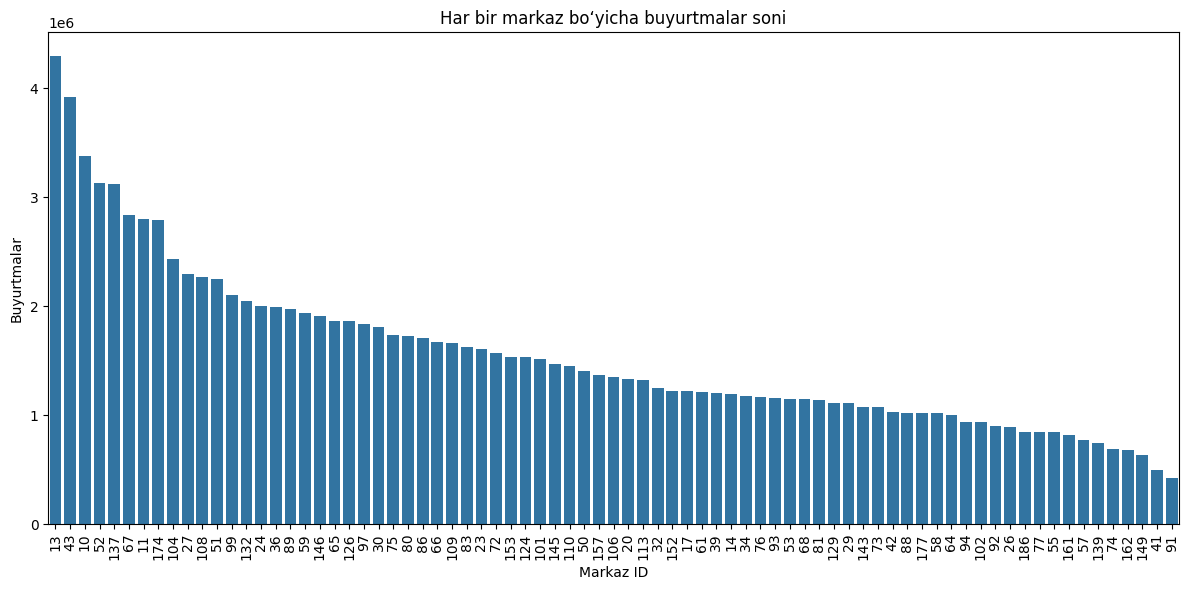

In [9]:
center_orders = df.groupby("center_id")["num_orders"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=center_orders.index.astype(str), y=center_orders.values)
plt.xticks(rotation=90)
plt.title("Har bir markaz bo‘yicha buyurtmalar soni")
plt.xlabel("Markaz ID")
plt.ylabel("Buyurtmalar")
plt.tight_layout()
plt.show()


# Vaqt (week) bo‘yicha trend

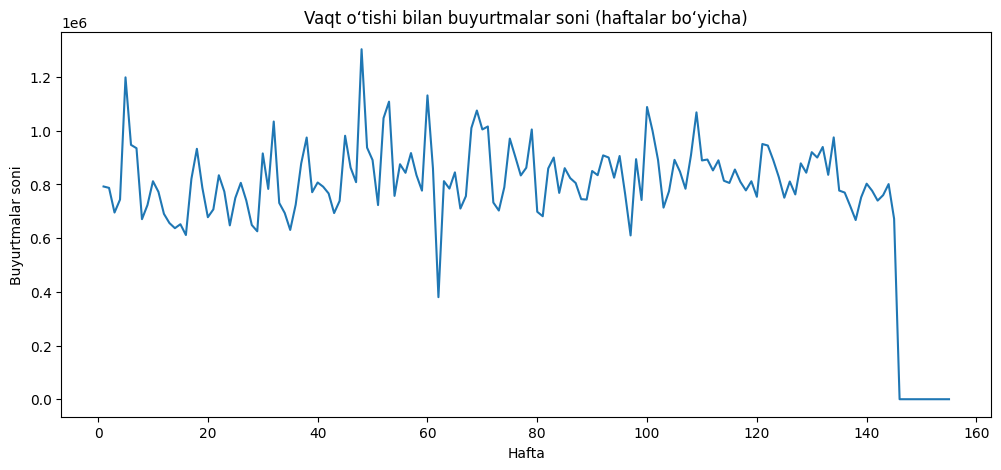

In [10]:
weekly_orders = df.groupby("week")["num_orders"].sum()

plt.figure(figsize=(12,5))
sns.lineplot(x=weekly_orders.index, y=weekly_orders.values)
plt.title("Vaqt o‘tishi bilan buyurtmalar soni (haftalar bo‘yicha)")
plt.xlabel("Hafta")
plt.ylabel("Buyurtmalar soni")
plt.show()


# Promo (Emailer va Homepage) ta’siri

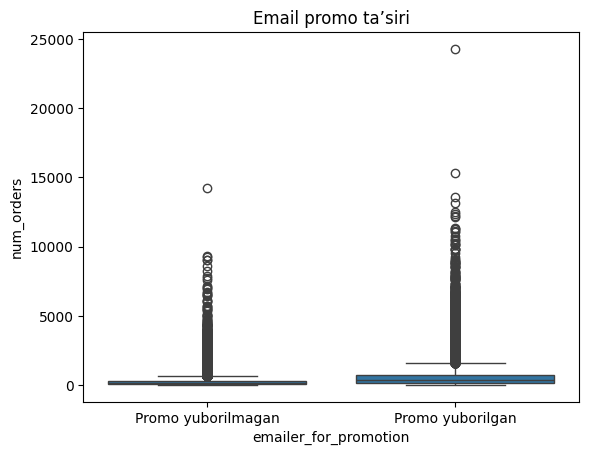

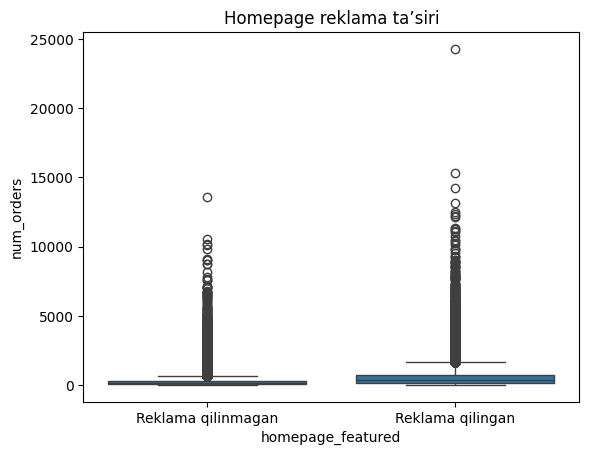

In [11]:
# Emailer
sns.boxplot(x="emailer_for_promotion", y="num_orders", data=df)
plt.xticks([0,1], ["Promo yuborilmagan", "Promo yuborilgan"])
plt.title("Email promo ta’siri")
plt.show()

# Homepage promo
sns.boxplot(x="homepage_featured", y="num_orders", data=df)
plt.xticks([0,1], ["Reklama qilinmagan", "Reklama qilingan"])
plt.title("Homepage reklama ta’siri")
plt.show()


# Meal va center birgalikdagi ta’siri:

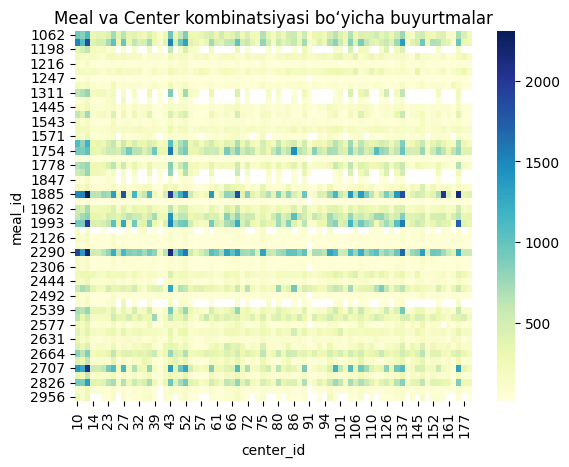

In [12]:
meal_center = df.groupby(["meal_id", "center_id"])["num_orders"].mean().unstack()
sns.heatmap(meal_center, cmap="YlGnBu")
plt.title("Meal va Center kombinatsiyasi bo‘yicha buyurtmalar")
plt.show()


In [6]:
import pandas as pd
import random

# Foydalanuvchi dataseti
df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\SML_2_Pr\Data\raw_data\data_merged.csv")

# Unikal meal_id larni olish
unique_meals = df["meal_id"].unique()

# Kategoriya va cuisine variantlari
categories = ['Beverages', 'Rice Bowl', 'Desert', 'Soup', 'Main Course', 'Sandwich', 'Snack']
cuisines = ['Indian', 'Thai', 'Italian', 'Mexican', 'Continental', 'Chinese']

# Yangi meal_info jadvali yaratish
meal_info = pd.DataFrame({
    "meal_id": unique_meals,
    "category": [random.choice(categories) for _ in range(len(unique_meals))],
    "cuisine": [random.choice(cuisines) for _ in range(len(unique_meals))]
})

# Saqlash
meal_info.to_csv("meal_info.csv", index=False)


In [7]:
df_meal = pd.read_csv("meal_info.csv")

In [8]:
df_meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [9]:
# Asosiy dataset bilan birlashtirish
df_meal = df.merge(meal_info, on="meal_id", how="left")


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489121 entries, 0 to 489120
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             489121 non-null  int64  
 1   id                     489121 non-null  int64  
 2   week                   489121 non-null  int64  
 3   center_id              489121 non-null  int64  
 4   meal_id                489121 non-null  int64  
 5   checkout_price         489121 non-null  float64
 6   base_price             489121 non-null  float64
 7   emailer_for_promotion  489121 non-null  int64  
 8   homepage_featured      489121 non-null  int64  
 9   num_orders             456548 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 37.3 MB


In [13]:
df = df_meal

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489121 entries, 0 to 489120
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             489121 non-null  int64  
 1   id                     489121 non-null  int64  
 2   week                   489121 non-null  int64  
 3   center_id              489121 non-null  int64  
 4   meal_id                489121 non-null  int64  
 5   checkout_price         489121 non-null  float64
 6   base_price             489121 non-null  float64
 7   emailer_for_promotion  489121 non-null  int64  
 8   homepage_featured      489121 non-null  int64  
 9   num_orders             456548 non-null  float64
 10  category               489121 non-null  object 
 11  cuisine                489121 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 44.8+ MB


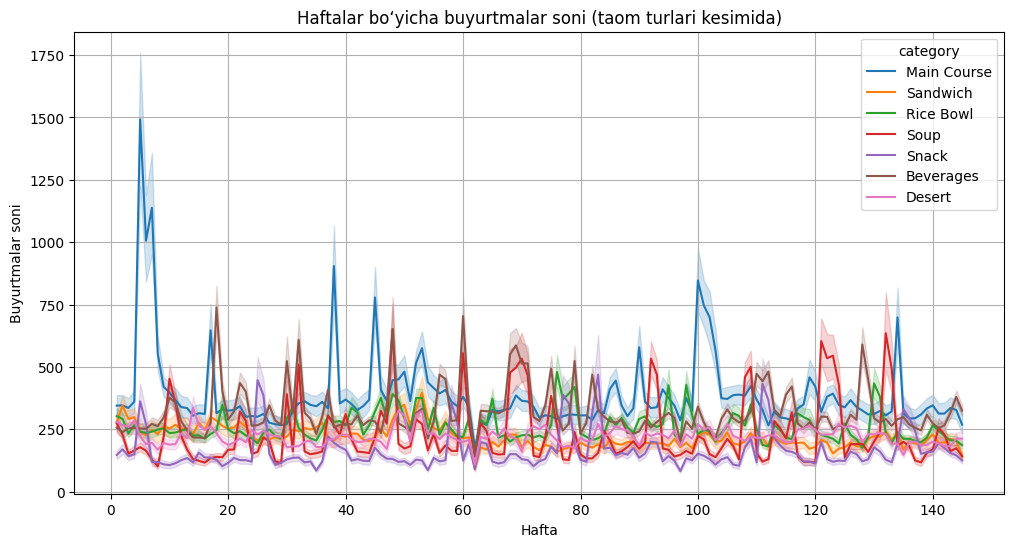

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='week', y='num_orders', hue='category')
plt.title('Haftalar bo‘yicha buyurtmalar soni (taom turlari kesimida)')
plt.xlabel('Hafta')
plt.ylabel('Buyurtmalar soni')
plt.grid(True)
plt.show()


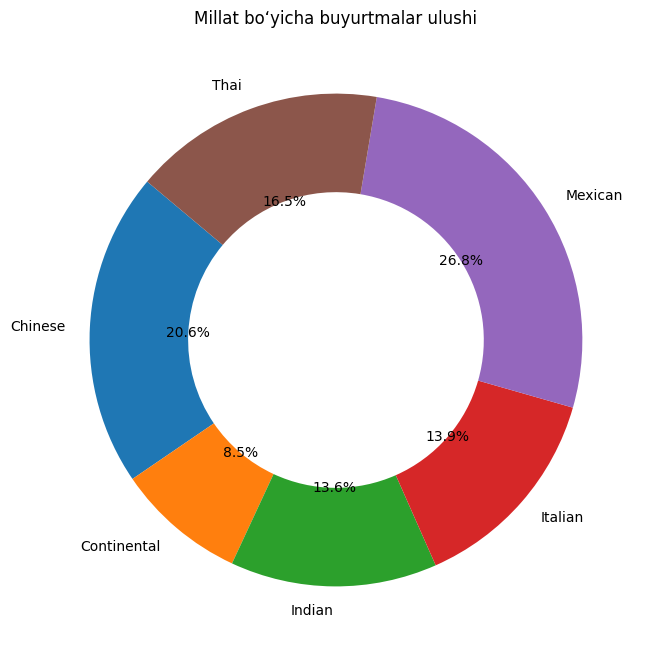

In [23]:
cuisine_orders = df.groupby("cuisine")["num_orders"].sum().reset_index()

plt.figure(figsize=(8,8))
plt.pie(
    cuisine_orders["num_orders"], 
    labels=cuisine_orders["cuisine"], 
    autopct='%1.1f%%', 
    startangle=140,
    wedgeprops=dict(width=0.4)  # markazda teshik (donut chart)
)
plt.title("Millat bo‘yicha buyurtmalar ulushi")
plt.show()


C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_3460\4205345046.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




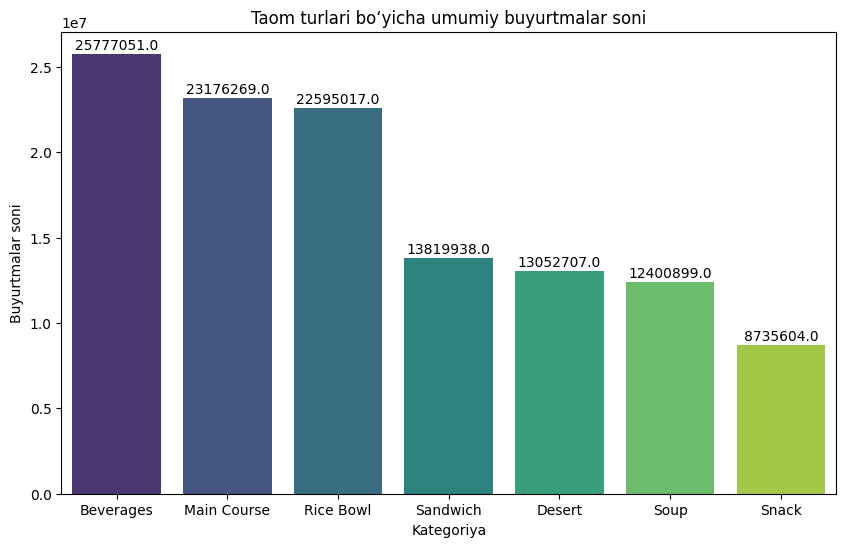

In [24]:
category_orders = df.groupby("category")["num_orders"].sum().reset_index().sort_values(by="num_orders", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=category_orders, x="category", y="num_orders", palette="viridis")
plt.title("Taom turlari bo‘yicha umumiy buyurtmalar soni")
plt.xlabel("Kategoriya")
plt.ylabel("Buyurtmalar soni")

# Ustiga raqamlarni yozish
for i, v in enumerate(category_orders["num_orders"]):
    plt.text(i, v + max(category_orders["num_orders"])*0.01, str(v), ha='center')

plt.show()


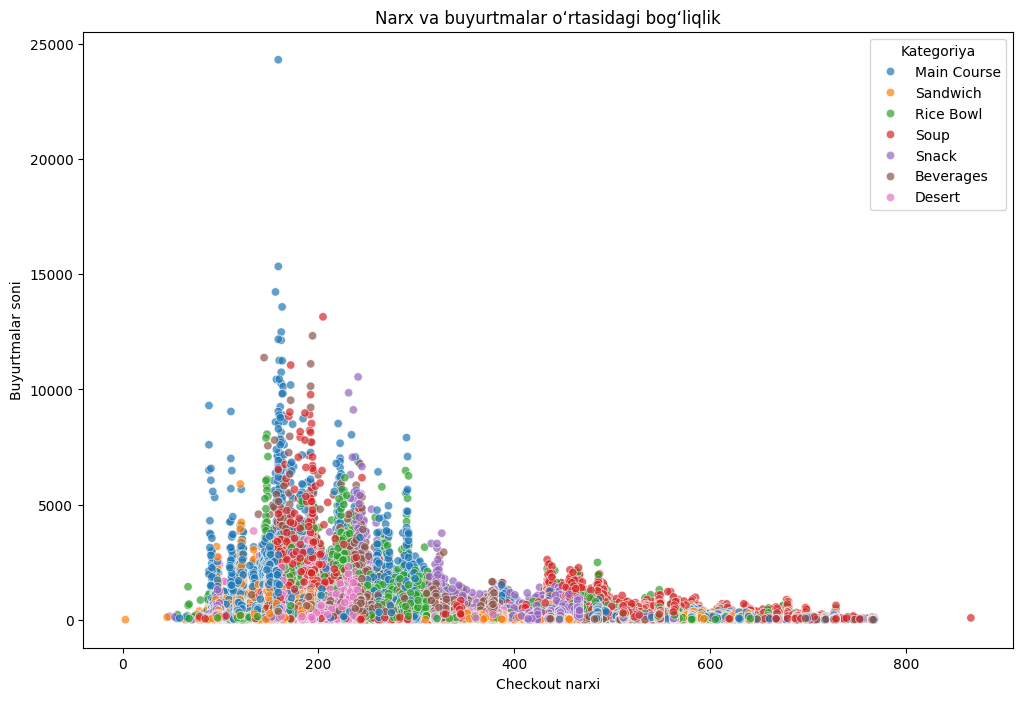

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="checkout_price", y="num_orders", hue="category", alpha=0.7)
plt.title("Narx va buyurtmalar o‘rtasidagi bog‘liqlik")
plt.xlabel("Checkout narxi")
plt.ylabel("Buyurtmalar soni")
plt.legend(title="Kategoriya")
plt.show()
